In [8]:
%load_ext autoreload
%autoreload 2

import numpy as np
import os,sys
import pylab as plt
%matplotlib inline
from pylab import get_cmap
import glob


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
src_dir = '../src'
sys.path.append(src_dir)
from jsd import jsdalpha

In [10]:
src_meta = '../../gutenberg-frozen-2018-07-18/src/'
sys.path.append(src_meta)
from metaquery import meta_query


In [11]:
# Load meta data

In [13]:
meta=meta_query(path=src_meta+'../metadata/metadata.csv')

In [42]:
import matplotlib as mpl

mpl.rcParams['axes.titlesize'] = 16
mpl.rcParams['axes.labelsize'] = 12
mpl.rcParams['legend.fontsize'] = 12
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False

# 1) Textlength

In [24]:
meta.reset()

path_text = os.path.abspath(os.path.join(src_meta,os.pardir,'data','text'))
list_N = []
for file in list(glob.glob( path_text+'/PG*_text.txt' )):
    with open(file) as f:
        x = f.readlines()
    N = len(x)
    list_N += [N]

# 2) Find all books that could have been written at a given time 

Note we only have the year of the authors' birth and death

In [14]:
## get all records that have information on yearofauthorbirth and yearof authordeath
meta.reset()
meta.filter_year([-10000,10000])

In [15]:
meta.df

,id,title,author,authoryearofbirth,authoryearofdeath,language,downloads,subjects,type
1,PG1,The Declaration of Independence of the United ...,"Jefferson, Thomas",1743.0,1826.0,['en'],518.0,"{'United States. Declaration of Independence',...",Text
3,PG3,John F. Kennedy's Inaugural Address,"Kennedy, John F. (John Fitzgerald)",1917.0,1963.0,['en'],42.0,{'United States -- Foreign relations -- 1961-1...,Text
4,PG4,Lincoln's Gettysburg Address: Given November 1...,"Lincoln, Abraham",1809.0,1865.0,['en'],71.0,"{'Lincoln, Abraham, 1809-1865. Gettysburg addr...",Text
6,PG6,Give Me Liberty or Give Me Death,"Henry, Patrick",1736.0,1799.0,['en'],49.0,{'Virginia -- Politics and government -- 1775-...,Text
8,PG8,Abraham Lincoln's Second Inaugural Address,"Lincoln, Abraham",1809.0,1865.0,['en'],43.0,{'United States -- Politics and government -- ...,Text
9,PG9,Abraham Lincoln's First Inaugural Address,"Lincoln, Abraham",1809.0,1865.0,['en'],48.0,{'United States -- Politics and government -- ...,Text
15,PG15,Moby Dick,"Melville, Herman",1819.0,1891.0,['en'],828.0,"{'Whaling -- Fiction', 'Sea stories', 'Ahab, C...",Text
17,PG17,The Book of Mormon: An Account Written by the ...,"Smith, Joseph, Jr.",1805.0,1844.0,['en'],203.0,"{'Mormon Church -- Sacred books', 'Church of J...",Text
18,PG18,The Federalist Papers,"Madison, James",1751.0,1836.0,['en'],352.0,{'Constitutional history -- United States -- S...,Text
19,PG19,The Song of Hiawatha,"Longfellow, Henry Wadsworth",1807.0,1882.0,['en'],229.0,{'Iroquois Indians -- Kings and rulers -- Poet...,Text


In [16]:
hmin = 20 ## consider minimum age to write a book as 20
list_tmin = np.array(meta.df['authoryearofbirth'])+hmin
list_tmax = np.array(meta.df['authoryearofdeath'])

In [19]:
t1 = min(list_tmin)
t2 = max(list_tmax)

arr_t2 = np.arange(t1,t2+1,1)
print(arr_t)
arr_n2 = 0*arr_t2
for i_t,t in enumerate(arr_t2):
    n = len( np.where( (list_tmin<=t)&(list_tmax>=t) )[0] )
    arr_n2[i_t] = n

[ -730.  -729.  -728. ...,  2013.  2014.  2015.]


# 3) All books from a language

In [26]:
meta.reset()
c_languages = meta.get_lang_counts()
arr_n = []
arr_l = []
for l,n in c_languages.most_common():
    arr_n += [n]
    arr_l += [l]
arr_n = np.array(arr_n)
arr_l = np.array(arr_l)

# Plot

In [18]:
# ###########
# ## Setup ##
# ###########
# # number of pt for column in latex-document
# fig_width_pt = 510  # single-column:510, double-column: 246; Get this from LaTeX using \showthe\columnwidth
# inches_per_pt = 1.1/72.27 # Convert pt to inches
# width_vs_height = (np.sqrt(5)-1.0)/2.0 # Ratio of height/width [(np.sqrt(5)-1.0)/2.0]
# fig_width = fig_width_pt*inches_per_pt  # width in inches
# fig_height = width_vs_height*fig_width  # height in inches
# fig_size = [fig_width,fig_height]

# # here you can set the parameters of the plot (fontsizes,...) in pt
# params = {'backend': 'ps',
#           'axes.titlesize':16,
#           'axes.labelsize': 14,
#           'text.fontsize': 12,
#           'legend.fontsize': 12,
# #           'figtext.fontsize': 12,
#           'xtick.labelsize': 12,
#           'ytick.labelsize': 12,
          
#           'text.usetex': True,
#           'ps.usedistiller' : 'xpdf',
#           'figure.figsize': fig_size,
#           'text.latex.unicode':True,
#           'text.latex.preamble': [r'\usepackage{bm}'],
          
#           'xtick.direction':'out',
#           'ytick.direction':'out',
          
#           'axes.spines.right' : False,
#           'axes.spines.top' : False
#          }
# plt.rcParams.update(params)

In [40]:
from matplotlib import rc
rc('text', usetex=True)

/home/martin/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


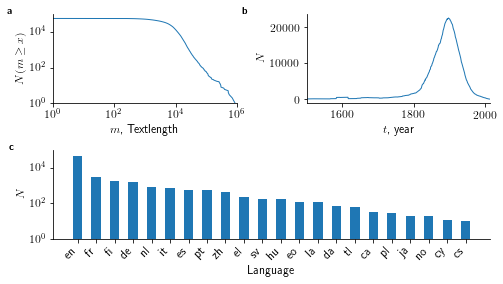

In [55]:
# fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(7, 2), tight_layout=True)
fig = plt.figure(figsize=(7,4), tight_layout=True)


# color = red
ax1 = plt.subplot(221)
ax2 = plt.subplot(222)
ax3 = plt.subplot(212)

###############
ax = ax1

n = len(list_N)
x = np.sort(np.array(list_N))
y = (np.arange(n)+1)

ax.plot(x,n-y,lw=1)
ax.set_xlabel(r'$m$, Textlength')
ax.set_ylabel(r'$N(m \geq x)$')

# ax.set_ylim(0.00001,1)
ax.set_ylim(1,10**5)

ax.set_xlim(10**0,10**6)
ax.set_xscale('log')
ax.set_yscale('log')
ax.annotate(r'\textbf{a}',xy=(-0.25,1.0),xycoords = 'axes fraction',)

#########
ax = ax2
x = arr_t2
y = arr_n2
ax.plot(x,y,lw=1)
ax.set_xlabel(r'$t$, year')
ax.set_ylabel(r'$N$')

ax.set_xlim(1500,2015)
ax.annotate(r'\textbf{b}',xy=(-0.35,1.0),xycoords = 'axes fraction',)

###################
ax = ax3

indmax = 22#len(arr_n)

x = np.arange(indmax)
y = arr_n[:indmax]
z = arr_l[:indmax]

ax.bar(x,y,width = 0.5)
ax.set_xlabel(r'Language')
ax.set_ylabel(r'$N$')

ax.set_xticks(x)
ax.set_xticklabels(z,rotation=45, ha='right')

# ax.set_xlim(1500,2015)
# ax.set_ylim(1,10**5)

ax.set_ylim(1,10**5)
# ax.set_xscale('log')
ax.set_yscale('log')
ax.annotate(r'\textbf{c}',xy=(-0.1,1.0),xycoords = 'axes fraction',)

##############

fig.savefig("../figures/basicstats_combined.pdf")